# [W241 Final Project] Crowdsourcing: Can Instructions Improve the Quality and Accuracy of Labelled Data? 
## Authors: Vivian Lu, Aditi Khullar, Sergio Ferro

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the raw files
first_pilot = pd.read_csv('first_pilot.csv')
second_pilot = pd.read_csv('second_pilot.csv')
control = pd.read_csv('manipulated_data_control_full_dropped.csv')
publicgood = pd.read_csv('manipulated_data_publicgood_full_dropped.csv')
evaluation = pd.read_csv('manipulated_data_evaluation_full_dropped.csv')

# 1.0 Introduction & Motivation

We were motivated in figuring out what makes quality of data collected from crowdsourcing platforms better. Contributors--often from third-world countries--log in to these crowdsourcing platforms to answer questions submitted by researchers, analysts, and data scientists from multiple companies. We know how important the **quality of human labeled data can be for various supervised machine learning algorithm.**
What we were most interested in exploring was to see **if apart from money, are there other treatments that we can provide to increase the quality of the labeled datasets collected from the crowd.**  

Given that instructions are often present in most of these crowdsourcing platforms, **we wondered if altering the instructions with a particular message could encourage users to put in more effort and try harder on these labelling jobs.**

We used [Figure8](https://www.figure-eight.com/) platform, a highly customizable online tool that can annotate text, images, video, or audio in whatever way is right for your usecase. We chose this platform because: 
1. We have had professional success stories of using this platform for collecting training data
2. We did not want to go with free platform due to lack of availability of responders on these free alternatives
3. Since, this is a paid platform, we wanted to see which treatment beyond payment motivates the responders


# 2.0 Pilot Studies

In order to understand the sorts of questions that we could provide to contributors that would provide enough variation for analysis, we launched 2 pilot studies as we learned what contributors could and could not do on the Figure8 platform.

## 2.1 Pilot 1 

**Motivation for Pilot 1:** Contributors can easily log into the Figure8 platform to take tests without reading instructions, which would be our form of delivering treatment as we wanted to vary instructions to see their effect on contributors' scores. Therefore, we launched pilot 1 to understand how likely it was that contributors would actually read instructions. **To test this, we placed an 'attention check' within the instructions in addition to a basic set of instructions that would be provided to everyone.** 

Specfically, our attention check for pilot 1 asked for contributors to select a specific answer ("Positive") to a question ("This is a lion") if encountered. We define here that a contributor has read instructions by looking to see if they answered this attention check correctly. 

Our first pilot consisted of using short product reviews to be categorized as positive or negative sentiment. We initially chose this dataset due to its simplicity in understanding the English language. Furthermore, product reviews did not seem to need any specific knowledge regarding particular fields. 

*Image 1.0 (below):* Instructions encompassed within Pilot 1

![Pilot 1 screenshot](./images/pilot1.png "Pilot1")


In [3]:
# Number of units (questions) launched
nul = len(first_pilot._unit_id.unique())
nur = len(first_pilot._worker_id.unique())


**Quick stats about Pilot 1:**

* **Number of questions launched:** 113
* **Total unique responders:** 77
* **Launch date:** Tuesday, March 26, 2019
* **Launch time:** 11pm
* **Completion time:** 7 hours 

### 2.1.1 Data collected by Figure8

Below, we provide all fields collected on the contributors from Figure8 platform

**Field Definitions**


    _unit_id: A unique ID number created by the system for each question
    _created_at: The time the contributor submitted the judgement 
    _golden: This will be "true" if this is an attention check question, otherwise it is "false"
    _id: A unique ID number generated for this specific judgment
    _missed: This will be "true" if the row is an incorrect judgment on a test question.
    _started_at: The time at which the contributor started working on the judgement
    _tainted: This will be "true" if the contributor has been flagged for falling below the required accuracy.
    _channel: The work channel that the contributor accessed the job through.
    _trust: The contributor's accuracy. 
    _worker_id: A unique ID number assigned to the contributor.
    _country: The country the contributor is from.
    _region: A region code for the area the contributor is from.
    _city: The city the contributor is from.
    _ip: The IP address for the contributor.
    _gold: The correct answer for the test question.

We can use **time of response, trust scores, cities and countries** to check the balances between groups. The **tainted indicator** tells us who was dropped and we can report on their statistics. 


In [4]:
first_pilot.sort_values('_started_at').head(5)

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,_country,_region,_city,_ip,please_select_the_sentiment_feeling_of_the_product_review,1,label,please_select_the_sentiment_feeling_of_the_product_review_gold,text,this_is_a_lion
333,2218243929,3/26/2019 02:25:37,True,4661146712,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
362,2218245535,3/26/2019 02:25:37,True,4661146708,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
300,2216130240,3/26/2019 02:25:37,True,4661146706,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
582,2218246446,3/26/2019 02:25:37,True,4661146711,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN
686,2218246733,3/26/2019 02:25:37,True,4661146715,NaN,3/26/2019 02:24:55,False,clixsense,1.0,44980050,TUR,68,Ankara,94.54.16.1,1,NaN,1,1.0,This is a lion,NaN


### 2.1.2 Average response time 
We note that on average, contributors spent 13 seconds per question. The minimum time spent on a question was 2 seconds while the maximum time spent on a question was nearly 1.5 minutes. 

In [5]:
first_pilot['_time_to_respond'] = (first_pilot._created_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S"))-first_pilot._started_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))/5
first_pilot['_time_to_respond'].describe().reset_index().set_index('index').loc[['min', 'max', 'mean']]


,_time_to_respond
index,
min,0 days 00:00:02.400000
max,0 days 00:01:24.800000
mean,0 days 00:00:13.873684


###  2.1.3 Contributor Countries and Trust distributions

To get a sense of where our population was coming from, we examine their characteristics.

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1a1952d5c0> has a label of '_trust' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


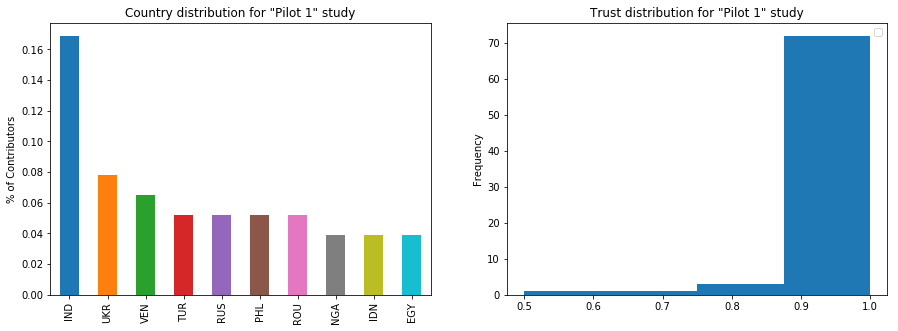

In [50]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_df = first_pilot[['_worker_id','_country']].drop_duplicates().reset_index(drop=True)
country_count  = country_df._country.value_counts()
country_count = country_count[:10,]/country_df.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Pilot 1" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = first_pilot[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Pilot 1" study')
plt.show()

All our contributors came from a total of 10 different countries. 

Since the pilot was launched at 11:00 pm EST, most of the contributors came from the country which are in +5GMT. 
We saw about 16% of the contributors in pilot 1 coming from India.

Most of the contributors were high trust contributors, in which "trust" was a metric gauging how "trustworthy" a contributor was based on their previous performances on other tests. It is unknown how Figure8 decides the trust value of contributors, but it should be noted that test administrators (such as ourselves) do not have access to this trust metric beforehand. Furthermore, we made sure to turn off the setting in Figure8 that specifies particular channels within specific regions of the world for distribution or any characteristics (such as trust) that could skew our population in any way. Lastly we depict the distribution of our contributors' trust scores, indicating that most of them were of fairly high trust scores. We will continue to show the distribution of the contributors' trust values to make sure that experiment results will not be biased due to weaker contibutors.

### 2.1.4 Scores

Scores are defined as the percentage of correctly answered questions for each contributor. In order to detect an effect, we needed to ensure a certain amount of variation in the scores by our contributors. 

In [7]:
# for each worker, find their scores 
workers = list(first_pilot['_worker_id'].unique())
pct_correct = []
for w in workers: 
    subdf=first_pilot[first_pilot['_worker_id']==w]
    correct=len(subdf[subdf['please_select_the_sentiment_feeling_of_the_product_review']==subdf['label']])/len(subdf)*100
    pct_correct.append(correct)

pilot1_scores=pd.DataFrame([workers, pct_correct]).T
pilot1_scores.columns=['workers','scores']


In [8]:
pilot1_scores.describe().round(decimals=2)

,workers,scores
count,77.00,77.00
mean,39883889.09,96.49
std,8159923.44,7.39
min,6342275.00,70.00
25%,38198526.00,100.00
50%,44094454.00,100.00
75%,45020428.00,100.00
max,45190390.00,100.00


Looking at the table above, pilot 1 showed an average score of 96.49%, leaving not much room for improvement. We can also observe that the lowest score obtained in the sentiment analysis questions in Pilot 1 was 70% while a majority of the contributors actually scored everything correctly. **Immediately, we note that perhaps our questions are too easy--contributors do not need to even focus to get the questions right and thus the variance in our questions is diminished significantly.**

In [9]:
# For each worker, tally up how many attention checks they received 
total_q = []
compl_q = []
noncompl_q = []
for w in workers: 
    subdf = first_pilot[first_pilot['_worker_id']==w]
    total_q.append(len(subdf))
    compl_q.append(len(subdf[subdf['_golden']==True]))
    noncompl_q.append(len(subdf[subdf['_golden']==False]))

typesofq=pd.DataFrame([workers, total_q, compl_q, noncompl_q]).T 
typesofq.columns=['workers','total_q','attn_check_q','non_attn_check_q']
typesofq[['total_q','attn_check_q','non_attn_check_q']].describe().round(decimals=2)

,total_q,attn_check_q,non_attn_check_q
count,77.00,77.00,77.00
mean,9.87,5.97,3.90
std,0.80,0.16,0.64
min,5.00,5.00,0.00
25%,10.00,6.00,4.00
50%,10.00,6.00,4.00
75%,10.00,6.00,4.00
max,10.00,6.00,4.00


Based on a quick tally of the types of questions that workers received, we also noticed that some workers received **ONLY** attention check questions and none of the regular sentiment analysis questions (see the minimum of 0 for the column 'non_attn_check_q', which is the total number of non attention check questions). 

Moreover, as seen below, almost everyone got the attention check question correct! Only 5 individuals ('workers' column below) answered attention check questions incorrectly (and even then, they got most of them right). 

In [11]:
total_gold = []
sum_gold = []
for w in workers: 
    subdf = first_pilot[(first_pilot['_worker_id']==w) & (first_pilot['_golden']==True)][['_golden','label','please_select_the_sentiment_feeling_of_the_product_review']]
    subdf['correct']=subdf['label']*subdf['please_select_the_sentiment_feeling_of_the_product_review']
    total_gold.append(len(subdf[subdf['_golden']==True]))
    sum_gold.append(sum(subdf['correct']))
    
attncheck_q=pd.DataFrame([workers, total_gold, sum_gold]).T
attncheck_q.columns=['workers','total_attncheck_q','correct_attncheck_q'] 
attncheck_q['pct_attncheck_correct']=attncheck_q['correct_attncheck_q']/attncheck_q['total_attncheck_q']*100

attncheck_q[attncheck_q['correct_attncheck_q']<attncheck_q['total_attncheck_q']]
    

,workers,total_attncheck_q,correct_attncheck_q,pct_attncheck_correct
18,32671231,6,4,66.666667
30,45184673,6,3,50.000000
51,44592322,6,5,83.333333
54,45189628,6,5,83.333333
73,45113895,6,5,83.333333


### 2.1.5 Lessons learnt

From pilot 1, we learned the following: 

* **Time of launch affects the contributor pool and which part of the world they come from.**
* Only some workers only received attention check questions and hence: 
    * For subsequent experiments, we randomized the units before uploading to the platform. 
    * We included attention check questions when calculating the scores for each contributor.
* **Nearly everyone got the attention check question correct.** This could mean either (1) everyone read the instructions; (2) People somehow deduced that it was a positive experience when seeing a product review that mentioned a lion. **This forced us to rethink what an attention check should consist of. Primarily, we learned that our attention check--if any--should not have the chance of being left to subjective interpretations.** 
* **Our sentiment analysis questions were too easy, thus leaving almost no room for improvement using treatments.** 

## 2.2 Pilot 2 

Motivation for Pilot 2: Given our lessons learned from pilot 1, we decided on using a different set of questions--this time, asking contributors to label whether there were images present in an image. We downloaded a set of images that varied in difficulty which also consisted of various animals in different environments. To mix up the images, we also included pictures of without animals. Examples of our images included snails, butterflies, chameleons, and leaves. 

Example instructions are depicted below, where again, we attempted to include an 'attention check' question for the contributors.

![Pilot 2 screenshot](./images/pilot2.png "Pilot2")


In [10]:
# Number of units launched
nul2 = len(second_pilot._unit_id.unique())
nur2 = len(second_pilot._worker_id.unique())

*Quick summary of pilot 2:* 


* **Attention Check:** In order to check whether responders read the instructions we asked responders to choose **Yes** for a chameleon picture and write "This is a lion" in the text box that pops up. This particular attention check again seems counter-intuitive, but the intent was to see which contributors were truly paying attention and actually reading instructions to receive treatment. 
* **Number of units launched:** 108
* **Total unique responders:** 34
* **Launch date:** Wednesday, March 27, 2019
* **Launch time:** 7pm
* **Completion time:** 4 hours 

### 2.2.1 Data Collected

The same sort of data is collected as in Pilot 1, as seen below. 

In [12]:
second_pilot.sort_values('_started_at').head(5)

,_unit_id,_created_at,_golden,_id,_missed,_started_at,_tainted,_channel,_trust,_worker_id,...,_region,_city,_ip,animal_present,animal_types,other_animal_type,animal_present_gold,animal_types_gold,image_url,other_animal_type_gold
364,2220961025,3/27/2019 23:46:05,True,4666137441,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/BhjGxoc.png,NaN
489,2220962052,3/27/2019 23:46:05,True,4666137450,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,no,NaN,NaN,no,NaN,https://i.imgur.com/slPMbss.png,NaN
301,2220960834,3/27/2019 23:46:05,True,4666137452,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/X8UsZgs.png,NaN
332,2220960987,3/27/2019 23:46:05,True,4666137447,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,no,NaN,NaN,no,NaN,https://i.imgur.com/1q731DL.png,NaN
459,2220961402,3/27/2019 23:46:05,True,4666137444,NaN,3/27/2019 23:45:07,False,clixsense,1.0,44591122,...,NaN,NaN,94.131.215.9,yes,NaN,NaN,yes,NaN,https://i.imgur.com/SMlFTQ6.png,NaN


### 2.2.3 Average response time

We notice that the average time to respond per question was about 3 seconds higher than the average time to respond in pilot 1. This may be perhaps due to responders being forced to spend more time, possibly due to scrutinizing the image and also answering the attention check question. 

In [13]:
second_pilot['_time_to_respond'] = (second_pilot._created_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S"))-second_pilot._started_at.apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M:%S")))/5
second_pilot['_time_to_respond'].describe().reset_index().set_index('index').loc[['min', 'max', 'mean']]

,_time_to_respond
index,
min,0 days 00:00:02.400000
max,0 days 00:01:20
mean,0 days 00:00:16.027522


### 2.2.4 Contributor Countries and Trust distribution

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1a19700400> has a label of '_trust' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


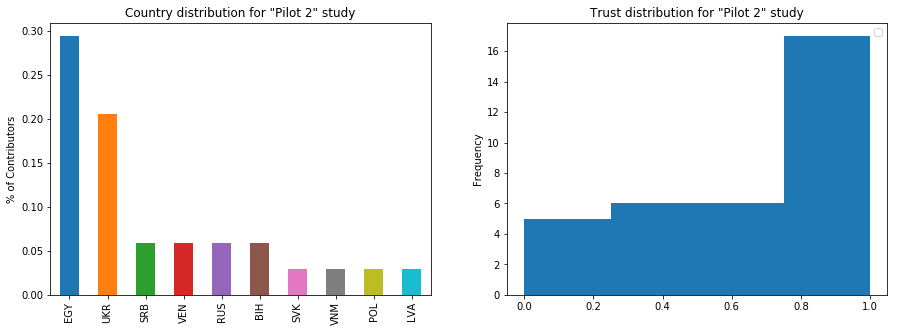

In [51]:
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_df = second_pilot[['_worker_id','_country']].drop_duplicates().reset_index(drop=True)
country_count  = country_df._country.value_counts()
country_count = country_count[:10,]/country_df.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Pilot 2" study')
axes[0].set_ylabel('% of Contributors')
trust_per_worker  = second_pilot[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Pilot 2" study')
plt.show()

All of our contributors came from a total of 10 countries (some contributors chose not to disclose their region). We now see that the highest number of responders came from Egypt (Over 25% of our responders were from Egypt).

We did note that the sample size of our second pilot was much smaller than our first pilot, partially due to cost. We also note that the trust distribution of our contributors in pilot 2 is much more widely spread compared to the trust distribution of contributors in pilot 1. In particular, we note that about 20% of the responders in pilot 2 lied below the 50% trust score. 

### 2.2.5 Pilot 1 vs Pilot 2: Agreement

The images were downloaded from a third source and therefore we did not have answer labels available at the time of the second pilot. This unfortunately meant that we were unable to score our participants in pilot 2. We'd like to note that we had launched pilot 2 with the intention of solely seeing how contributors would perform with image categorization compared to sentiment analysis. In particular, we wanted to know if the images would generate higher variance amongst responders as opposed to the sentiment analysis where almost everyone got their answers correct. 

However, do keep in mind that Figure8 is a crowdsourcing platform that seeks to provide a final 'consensus' label (the majority label) for the questions you administer in a test. Each question's 'consensus' label is provided with an **'agreement' score**--essentially the ratio of contributors who labelled the questions and agreed with each other on the majority label vs contributors who did not agree with the majority label. 

In the code block below, we examine that the agreement distribution for pilot 1 was on average 94% while the agreement distribution for pilot 2 was on average almost 91%. There is also a larger standard deviation in agreement for pilot 2 (15.8%) in comparison to pilot 1 (12.5%). We also note that the 25th percentile of agreement scores for pilot 1 was already 100% while pilot 2's 25th percentile of agreement scores was at 87%. From this, we conclude that pilot 2's image cateogrization questions did induce higher variability amongst results for our contributors. 

In [15]:
first_pilot_md = pd.read_csv('first_pilot_metadata.csv')
second_pilot_md = pd.read_csv('second_pilot_metadata.csv')
print('First pilot - Normal questions agreement')
print(first_pilot_md[first_pilot_md._golden == False]['please_select_the_sentiment_feeling_of_the_product_review:confidence'].describe())
print()
print('Second pilot - Normal questions agreement')
print(second_pilot_md[second_pilot_md._golden == False]['animal_present:confidence'].describe())
print()

First pilot - Normal questions agreement
count    100.000000
mean       0.943731
std        0.125110
min        0.647100
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: please_select_the_sentiment_feeling_of_the_product_review:confidence, dtype: float64

Second pilot - Normal questions agreement
count    100.000000
mean       0.908733
std        0.158092
min        0.529400
25%        0.876075
50%        1.000000
75%        1.000000
max        1.000000
Name: animal_present:confidence, dtype: float64



### 2.2.6 Attention checks amongst responders in Pilot 1 vs Pilot 2

Finally, we examined the attention checks in terms of agreement in our 2 pilots. Given that our attention check's original intention was to just see if contributors were actually reading instructions, we needed to make sure that our attention check questions were easy enough to follow if contributors had just paid attention. 

In [16]:
print('First pilot - Attention check agreement')
print(first_pilot_md[first_pilot_md._golden == True]['please_select_the_sentiment_feeling_of_the_product_review:confidence'].describe())
print()
print('Second pilot - Attention check agreement')
print(second_pilot_md[second_pilot_md._golden == True]['animal_present:confidence'].describe())

First pilot - Attention check agreement
count    13.000000
mean      0.988431
std       0.013470
min       0.966400
25%       0.979300
50%       1.000000
75%       1.000000
max       1.000000
Name: please_select_the_sentiment_feeling_of_the_product_review:confidence, dtype: float64

Second pilot - Attention check agreement
count    8.000000
mean     0.956625
std      0.043806
min      0.865100
25%      0.948000
50%      0.956250
75%      0.989800
max      1.000000
Name: animal_present:confidence, dtype: float64


As expected, pilot 2's agreement scores had a much wider distribution compared to pilot 1's agreement scores. Some of this may be due to the smaller sample size in pilot 2, but we realized that pilot 2's attention check was harder and involved more steps compared to pilot 1. This concerned us, as we wanted an attention check that was not entirely brainless but also easy enough to answer given the contributor was paying attention to the instructions. **As a result, we learned to keep attention check questions simple in order to separate those who didn't read instructions apart from those who just found the attentio checks too complicated to answer.**

# 3.0 Main Experimental Setup

## 3.1 Lessons Learnt from Pilots 1 and 2

From Pilots 1 and 2, we had the following takeaways: 


* Questions regarding **images and the subjects within images require more focus** from the contributor, thus allowing for more variation in scoring accuracy from contributors. 
* We chose images of animals as they **do not require any specific knowledge from a particular area of study** and involves **no subjectivity as was needed when tagging the sentiment.**  
* We simplified our questions to reduce potential confusion from contributors. Namely, **we reduced answer choices to simply “Yes” or “No”**, and did not require any input from the contributor regarding the animals they see. 


## 3.2 Defining ATE

The **outcome** that we are interested in observing is defined as **the percentage of number of questions that the contributor answered correctly.** 


\begin{equation*}
ATE = Y_1 - Y_0 
\end{equation*}

\begin{equation*}
= \frac{\sum_i(percentage\ of\ correctly\ answered\ question\ in\ treatment)}{\sum{subjects\ in\ treatment}} - \frac{\sum_i(percentage\ of\ correctly\ answered\ question\ in\ control)}{\sum{subjects\ in\ control}} 
\end{equation*}

As Figure8 is a crowdsourcing platform that performs the service of obtaining labels, Figure8 releases a varying number of questions per contributor to get a ‘consensus’ label for the questions released for labelling. As test administrators, we are unable to bypass Figure8’s built-in feature; we are unable to specify a specific number of questions to be delegated out for each contributor. As a result, we do the best that we can and calculate the percentage of correctly answered questions out of all questions that the contributor received.

## 3.3 Defining Treatments

**Assigned treatment:** is the set of instructions that the contributor will see depending on the specific test that they clicked on. We provide images of the treatment instructions in subsequent sections below, but the main treatment groups we decided upon were: 
* **Control:** Our control group that receives the basic set of instructions asking contributors to view the image and label whether animals are present or not. The attention check question is also placed in the instructions. 
* **Public Good:** A treatment group that receives the basic set of instructions asking contributors to view the image and label whether animals are present or not. In addition, this treatment group receives a message about contributing towards the better good ("You will be helping us label images for better accuracy in training machine learning models that will be used by many other people"). The attention check question is also placed in the instructions. 
* **Evaluation:** A treatment group that receives the basic set of instructions asking contributors to view the image and label whether animals are present or not. In addition, this treatment group receives a message about being evaluated by their performance ("You will be evaluated based on the accuracy of your answers"). The attention check question is also placed in the instructions. 

Across all treatments, it should be noted that typeset was kept consistent throughout. Font size and color, which were changed intentionally to draw attention, were kept consistent across all treatments and control. 

**Random assignment**: Figure8 allows test administrators to release tests to specific channels (i.e. specific countries or regions for particular jobs). Contributors simly take tests as they appear available, which depends on the day of the week and also time of day.
* **Random assignment thus was based on day and not at the individual level.** As we have no way of controlling for who gets what treatment, we are unable to randomize which treatment the contributor will receive. **We therefore apply assignment to days, under the assumption that days are independent from contributors' performance (potential outcomes)**; it should not be that any particular day will provide to you individuals that are significantly different from contributors on another day. We will provide summary statistics to demonstrate the various types of individuals we got in each treatment to show that these crowds are more or less similar. 
* We did not restrict our experiment to any particular channels. To avoid 'cheating' or 'learning' of the questions that could ruin our treatment effects,  we released the treatment tests in the following order: (1) control (2) Public good (3) evaluation on separate days. **We also created a test bank of 232 pre-labelled images that Figure8 could release at random to contributors as they took the test, thus lowering the chances that a contributor would see the same questions even if they happened to take more than 1 test** (we mention the possibility of repeaters in a subsequent section and the consequences). 
* Ideally the best protocol to follow would have been to use a randomized number generator for the day of the week and select the days at random to release the tests, but due to time restrictions for the end of the W241 class, we were unable to perform such a protocol. The best we could do was allow the control version to be released first, followed by the two treatment branches of different days. 
* We realize that there may be potential repeaters (contributors who take more than 1 test). Unfortunately, there is no setting in Figure8 to prevent contributors from taking multiple tests. We are able to identify workers based on their contributor IDs, and we discuss the impact of keeping repeaters in a subsequent section. 

**Actual treatment received:** is the contributor reading the instructions to receive the treatment (which we want to see the effect of). 

In reality, we are unable to tell if a contributor actually reads the instructions or not. Therefore, to check whether contributors are reading the instructions at all, we asked them to choose "No" as an indication that they see no animal when they see the picture of a snail. We do realize, however, that even if a contributor reads the treatment instructions that they are assigned to, it could be possible that the contributor still answers the attention check incorrectly despite having received treatment. **It is very possible that contributors answered the attention checks correctly at random, thus making it rather hard to distinguish if people actually read instructions even if they got the attention check right.** We elaborate on this more in the assumptions (Section 3.7 Exclusion Restriction), but this particular realization influenced our decision to stick with a simple ITT analysis. 

## 3.4 Example Instructions for Control Group

![Control screenshot](./images/control.png "Control")

## 3.5 Example Instructions for Public Good Treatment

![PublicGood 2 screenshot](./images/publicgood.png "Public Good")

## 3.6 Example Instructions for Evaluation Treatment

![Evaluation screenshot](./images/evaluation.png "Evaluation")

# 3.7 Assumptions 

## 3.7.1 Exclusion restriction

On Green and Gerber’s Field Experiments p. 156, the exclusion restriction is defined as **“A subject’s treatment assignment does not matter once we account for whether a subject is actually treated”.**

An unanticipated obstacle occurred during our experiment with Figure8 that we had not realized would happen. Previous pilot studies had a fairly small test bank (no more than 50 questions), and therefore the attention check was made available to everyone. **Unfortunately, with 232 questions, Figure 8 did not provide the attention check to all contributors in all three of our experiment tests that were administered.** This begs the question: do we assume that only those who answered the attention check correctly are ones who got the treatment effect of our instructions? Would we label those who answered the attention check correctly as 'compliers' and those who answered the attention check incorrectly as 'noncompliers'? 

This particular exclusion restriction assumption would assume that our treatment instructions delivered its effect only through the pathway of people answering the attention check correctly. **We do not believe this to be true--as mentioned earlier, it could be that a contributor read the instructions and still managed to answer the attention check incorrectly. We have no way of proving that all noncompliers were NOT influenced by the treatment, and neither do we have any way of proving that all compliers WERE influenced by the treatment.**

As a result, we chose to present our results in a simple ITT analysis. We at least know that all contributors got some form of treatment, even if we do not know whether everyone actually read the relevant treatment instructions. 

## 3.7.2 Non interference

On Green and Gerber’s Field Experiments p. 155, the non interference assumption is defined as **“potential outcomes for each individual are unaffected by assignment or treatment of any other individuals”.** 

Non-interference should not be a problem for our experiment, as **contributors cannot “discuss” answers or the tests themselves, unless they happen to know each other.** Technically speaking, we won’t know if contributors are actually in communication with each other, but considering how diverse our population is (see section 5 for the number of countries that the individuals are from), it should be that non-interference is a fairly minimal (if any) problem.  


## 3.7.3 Non persistence

It should be noted that there is no mechanism on Figure8 that blocks contributors from taking more than 1 test; they are free to select any test that is released on a given day. 

Given that the **tests are fairly short**, and **the average time per test is 13-17 seconds** , we assume non-persistence for contributors who take multiple tests. In other words, there should be **no lingering effect amongst contributors** who take more than 1 test. In an attempt to avoid persistence across tests for repeating contributors, we made sure to space out the 3 experiments throughout the week to avoid contributors possibly ‘remembering’ what the questions were. Furthermore, we provided 232 questions in a test bank; Figure8 picks a subset of questions for the contributor, and thus there is a very high chance of selecting a completely different set of questions for the contributor even if they took more than 1 test. 


# 3.8 Results

## 3.8.1 Exploratory

We do a quick exploration analysis of the countries that the contributors came from for the control group study, public good study, and evaluation study. We also take a look at their trust scores to ensure that these contributors were more or less similar. 

**Main Takeaways from Exploratory Analysis:**
* For all 3 experiments, the top 2 countries with the most contributors were Venezuela and Egypt. We do note that the evaluation and public good treatment both had Serbia as one of the top 3 countries with contributors; this is perhaps launching around a similar time for both treatments on separate days. 
* Most contributors are have trust scores greater than 80%. We do see a few contributors who are considered to be 'untrustworthy'--in particular, note the few contributors who are below the 50% trust score in all three experiments. 

### Control

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1a18f489e8> has a label of '_trust' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


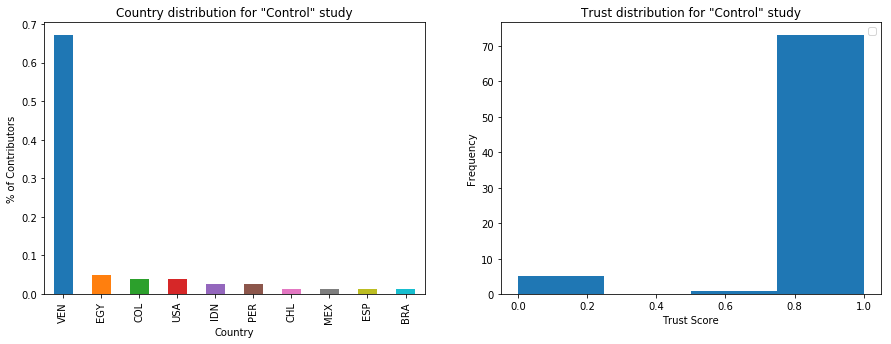

In [52]:
### control section 

f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_df = control[['_worker_id','_country']].drop_duplicates().reset_index(drop=True)
country_count  = country_df._country.value_counts()
country_count = country_count[:10,]/country_df.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Control" study')
axes[0].set_ylabel('% of Contributors')
axes[0].set_xlabel('Country')
trust_per_worker  = control[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Control" study')
axes[1].set_xlabel('Trust Score')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1a17879b38> has a label of '_trust' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


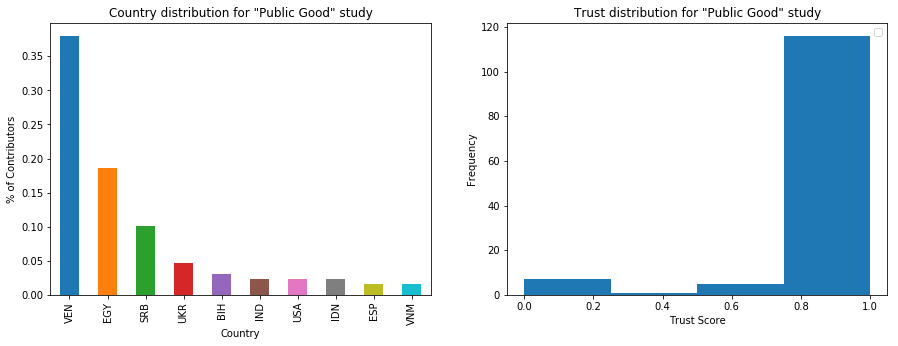

In [53]:
### public good section 

f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_df = publicgood[['_worker_id','_country']].drop_duplicates().reset_index(drop=True)
country_count  = country_df._country.value_counts()
country_count = country_count[:10,]/country_df.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Public Good" study')
axes[0].set_ylabel('% of Contributors')
axes[0].set_xlabel('Country')
trust_per_worker  = publicgood[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Public Good" study')
axes[1].set_xlabel('Trust Score')
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x1a17a78ba8> has a label of '_trust' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


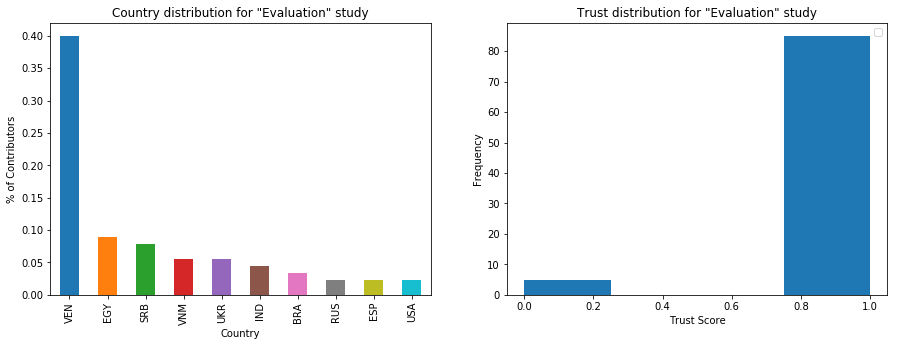

In [54]:
#### Evaluation section 
f, axes = plt.subplots(1, 2);
f.set_figheight(5)
f.set_figwidth(15)
country_df = evaluation[['_worker_id','_country']].drop_duplicates().reset_index(drop=True)
country_count  = country_df._country.value_counts()
country_count = country_count[:10,]/country_df.shape[0]
country_count.plot(kind='bar', ax=axes[0]);
axes[0].set_title('Country distribution for "Evaluation" study')
axes[0].set_ylabel('% of Contributors')
axes[0].set_xlabel('Country')
trust_per_worker  = evaluation[['_trust', '_worker_id']].groupby('_worker_id').mean();
trust_per_worker.plot(kind='hist', bins = 4, ax=axes[1]);
axes[1].set_title('Trust distribution for "Evaluation" study')
axes[1].set_xlabel('Trust Score')
plt.show()

## 3.8.2 Summary statistics for All contributors

We can see from the chart below (Table 1) that out of 283 total contributors, only 134 contributors received the attention check question. **Roughly half of the people in each treatment group received the compliance question**

**Definitions to know before reading the table:**

* Outcome ('Average Score') is measured in percentage points, and is from a scale of 0 to 100. 

* 'Trust' is a metric that Figure8 assigns to each contributor as they take tests. We do not know how these trust scores are calculated, but they vary from 0 to 1, with 1 being the highest possible indication of how 'trustworthy' a contributor is (i.e. they will not be the type of contributor that randomly clicks answers just to get payment). Furthermore, test administrators like us do not have the ability to filter out contributors based on this trust metric; this trust metric is practically unknown to us until after the results from the test have been published.

**Table 1:**
All R code to create metrics for this table will be in the appendix (Section...) 

![Result screenshot](./images/result.png "Result")

**Key takeaways that we noticed looking at the summary statistics for all contributors:**

* It almost looks like both our treatment groups performed worse on average compared to our control group. For example, we see the public good and evaluation treatment groups performing nearly 3 percentage points lower than the control group.
* Out of those who did receive the attention check ('Received Compliance?' column == Y), roughly 75% of them did comply. For example: 37 of the people in control received the attention check, and 28/37, or roughly 75%, of these people did correctly answer the attention check question. 
* While we do not know how Figure8 calculates 'trust' scores for their contributors, we would like to note that the average trust scores across all 3 groups was roughly similar. When comparing those who did and did not rececive attention check questions, the trust scores again look fairly similar, indicating that there most likely was not any selection bias in Figure8's platform in serving attention checks to specific people. 
* As mentioned before, we are not able to defend the exclusion restriction assumption, but it is worth noting that for those who did receive attention check questions AND answered correctly, their average scores in general did look to be higher than those who did receive attention check questions AND answered incorrectly. While we are not able to tell if this is due to actually receiving treatment or not, it is certainly worth thinking that general attentiveness is still a good bolster for score accuracy. 

## 3.8.3 ITT Analysis of All Contributors 

All R code for the following images can be found in the Appendix, section.....

![Result screenshot](./images/simle_itt_all.png "Nonrepeaters")

![Result screenshot](./images/simle_itt_regression.png "Nonrepeaters")

## Summary statistics for Non repeaters

Another obstacle that appeared within our analysis resulted **repeaters--contributors who took more than 1 test.** Unfortunately, Figure8 does not have a setting that prevents repeat contributors. 

**Table 2**: All R code to produce summary statistics for this table can be found in appendix section (). 

![Result screenshot](./images/nonrepeaters_summary.png "Nonrepeaters")

In Table 2 above, we replicate the same summary statistics as in Table 1, but this time we drop repeaters.

When tabulating repeaters, we noticed the following: 
* 10 contributors took both the control and public good tests. 
* 7 contributors took both the control and evaluation tests. 
* 23 contributors took both the public good and evaluation tests. 

This led to **40 repeaters total.** 

A possible concern would be that these repeaters could have 'learned' the test questions, and therefore improved their scores. We would argue **non-persistence**, as based on the earlier assumptions in this report. **In particular, it is highly unlikely that a repeating contributor would get the exact same set of questions as their previous test given that we provided such a large test bank of 232 questions. Moreover, as mentioned earlier, given that each test was fairly short (less than 1 minute), it is highly unlikely that there is any lingering effect amongst contributors who take more than 1 test.**

Furthermore, for non-persistence, we would like to highlight the following: 
* The number of people (even after dropping the repeaters) who received compliance questions still stays roughly around 50%.
* Average scores and their standard deviations in general do not seem to change much across all 3 experiments even after dropping the repeaters. 
* On average, we still see a 70% compliance rate amongst those who did receive compliance questions. We do see some fluctuations (i.e. in the evaluation group, we see 20 out of the 28 people who received compliance questions answer the compliance question correctly, thus resulting in a 71% compliance rate). However, this change is certainly fairly small. 
* The biggest portion of repeated contributors came from those who repeated both the public good and evaluation tests (both are treatment groups). If these contributors did "learn" from their previous test experience, we would expect repeaters' scores to be higher. By dropping the repeaters to produce the summary stats in Table 2 above, we would expect that the average scores for the public good and evaluation group to be lower than Table 1. We can see, however, that after dropping the repeaters, average scores did not show particular declines across the board for those who did or did not get compliance questions in the public good and evaluation groups. 

Finally, we also check if there is selection bias amongst those who are repeaters. A natural worry is that repeaters are perhaps 'greedy' for money and therefore are not exactly trustworthy contributors. Again, we examine below the histogram of the distribution of trust within our sample after dropping repeaters. Thankfully, it does not look like repeaters came from any particular strata of 'trustworthy' contributors. 

![Result screenshot](./images/trust_receivedandnotreceivedq_nonrepeaters.png "Nonrepeaters")

# Caveats 

* English is not a native language for the contributors 
* Time of day can affect treatment effect. Based on time of day whe nthe test was released, this could change which countries' contributors are coming from. 
* Our definition of 'compliance' was based on answering a compliance question incorrectly or correctly. We realize that this is a "proxy" of knowing whether the contributor read the instructions (and thus received the treatment) or not. Understanding the instructions, however, is a completely different story (and thus may have implicated whether a contributor responded to the compliance question correctly or not. Moreover, it is entirely possible that someone answered the compliance question wrong, but continued to answer all other questions attentively. 

# Conclusion 

* It is difficult to encourage people to read instructions 
* We are unable to determine any significant effects from the 2 treatments, suggesting that other than financial incentives, it is difficult to encourage contributors to try harder. 
* On average, it seems like contributors in treatment groups scored lower than control. This possibly suggests that treatment may have confused contributors (i.e. perhaps instructions made the contributors nervous, and hence they made more mistakes). 